#**PART 1**#

In [1]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.6.0'

In [2]:
#import the random seed generator
import random
random.seed(0)

#ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
#Importing the required libraries
import numpy as np
import pandas as pd
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import pickle
import os

**Importing the data into array**

In [ ]:
#importing the os library and getting the input folders in the given path
file_name='Part 1- Train data - images.npy'
Input_path='/content/gdrive/MyDrive/Colab Notebooks/CV_Notebooks/Project2'

In [ ]:
data=np.load(os.path.join(Input_path,file_name), allow_pickle=True)

In [ ]:
data.shape

(409, 2)

The input data has 409 entries with two columns each

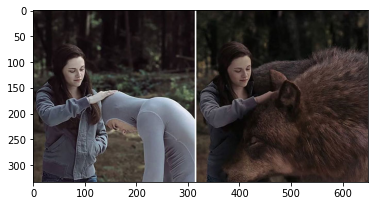

In [ ]:
plt.imshow(data[0][0])

In [ ]:
data[0][1]

[{'imageHeight': 333,
  'imageWidth': 650,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063},
   {'x': 0.1723076923076923, 'y': 0.45345345345345345}]},
 {'imageHeight': 333,
  'imageWidth': 650,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913},
   {'x': 0.6584615384615384, 'y': 0.46846846846846846}]}]

First column contains images

second column contains the bounding box coordinates along with image shape

This image has two faces and it's bounding box coordinates

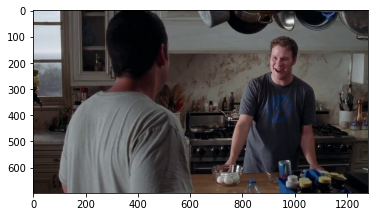

In [ ]:
plt.imshow(data[1][0])

In [ ]:
data[1][1]

[{'imageHeight': 697,
  'imageWidth': 1280,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.7053087757313109, 'y': 0.23260437375745527},
   {'x': 0.7692307692307693, 'y': 0.36182902584493043}]}]

This image has only one face and its coordinates

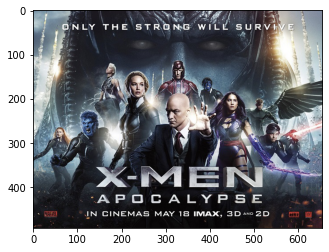

In [ ]:
plt.imshow(data[408][0])

In [ ]:
data[408][1]

[{'imageHeight': 493,
  'imageWidth': 656,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.3201219512195122, 'y': 0.2839756592292089},
   {'x': 0.4009146341463415, 'y': 0.4198782961460446}]},
 {'imageHeight': 493,
  'imageWidth': 656,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.4557926829268293, 'y': 0.38742393509127787},
   {'x': 0.5442073170731707, 'y': 0.5618661257606491}]},
 {'imageHeight': 493,
  'imageWidth': 656,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.6707317073170732, 'y': 0.38336713995943206},
   {'x': 0.7134146341463414, 'y': 0.4746450304259635}]},
 {'imageHeight': 493,
  'imageWidth': 656,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.16615853658536586, 'y': 0.4665314401622718},
   {'x': 0.22560975609756098, 'y': 0.563894523326572}]},
 {'imageHeight': 493,
  'imageWidth': 656,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.07164634146341463, 'y': 0.539553752535497},
   {'x': 0.11280487804878049, 'y': 0.586206896551

This image has more than two faces

**Creating the mask images array from the metadat given in the input array**

In [ ]:
IMAGE_HEIGHT=224
IMAGE_WIDTH=224

HEIGHT=28
WIDTH=28

In [ ]:
#Add original images into seperate array and create mask images array
X=np.zeros((len(data),IMAGE_HEIGHT, IMAGE_WIDTH,3),dtype=np.float32)
y=np.zeros((len(data),HEIGHT, WIDTH),dtype=np.uint8)

In [ ]:
from tqdm import tqdm
image_count=0
face_count=0
for img_data in tqdm(data):
  img=img_data[0]
  #print(img.shape)
  if(len(img.shape)>2):#Some images are of png type which has 4th column
    if(img.shape[2]==4):
      img=img[:,:,:-1]
  else:
    if(len(img.shape)==2):#Some images are of only two columns
      img=cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
  mask=np.zeros((img.shape[0],img.shape[1]),dtype=np.uint8)#creating mask of image size
  img=cv2.resize(img,(IMAGE_HEIGHT, IMAGE_WIDTH))#resizing image
  X[image_count]=img/255.0
  meta_data=img_data[1]
  for rect_data in meta_data:
    height=rect_data['imageHeight']
    width=rect_data['imageWidth']
    points=rect_data['points']
    if 'Face' in rect_data['label']:
      x1=round(width*points[0]['x'])
      y1=round(height*points[0]['y'])
      x2=round(width*points[1]['x'])
      y2=round(height*points[1]['y'])
      cv2.rectangle(mask,(x1,y1),(x2,y2),(255,255,255),-1)#Drawing rectangle and filling with same color
      face_count+=1
  
  #print("image+increment",image_count)
  mask=mask/255.0
  y[image_count]=cv2.resize(mask,(HEIGHT, WIDTH))
  image_count+=1
  #If we want, we can store the mask images into a folder
  #cv2.imwrite('/content/gdrive/MyDrive/Colab Notebooks/CV_Notebooks/Project2/box_image_{}.jpg'.format(image_count),mask)

y=y.astype(np.float32)
print("\nTotal number of images:",image_count)
print("\nTotal number of faces:",face_count)




100%|██████████| 409/409 [00:01<00:00, 340.85it/s]


Total number of images: 409

Total number of faces: 1132


**Checking the input images and masks**

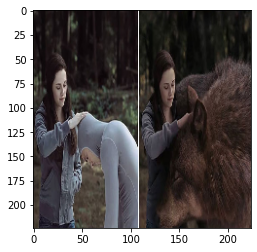

In [ ]:
plt.imshow(X[0])

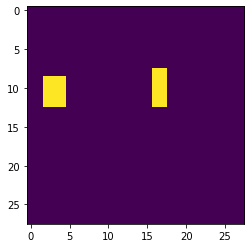

In [ ]:
plt.imshow(y[0])

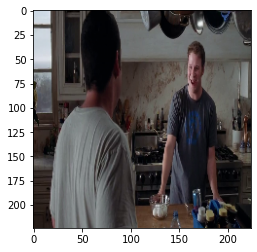

In [ ]:
plt.imshow(X[1])

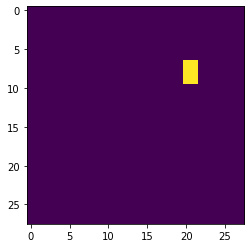

In [ ]:
plt.imshow(y[1])

In [ ]:
print(X.shape)
print(y.shape)

(409, 224, 224, 3)
(409, 28, 28)


**Test and train data splitting**

In [ ]:
#Splitting data ito train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(286, 224, 224, 3)
(286, 28, 28)


**Model creation and preprocessing**

Mobilenet model is used so we are preprocessing the data, to make suitable for mobilenet network

In [ ]:
from tensorflow.keras.applications.mobilenet import preprocess_input

X_train_1=preprocess_input(X_train)
X_test_1=preprocess_input(X_test)

In [ ]:
print(X_train_1.shape)
print(y_train.shape)

(286, 224, 224, 3)
(286, 28, 28)


**Loading the libraries**

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, Conv2D, Reshape, UpSampling2D
from tensorflow.keras.models import Model

In [ ]:
ALPHA=1
def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=ALPHA, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable

    block1 = model.get_layer("conv_pw_5_relu").output
    block2 = model.get_layer("conv_pw_11_relu").output
    block3 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block3), block2])
    x = Concatenate()([UpSampling2D()(x), block1])

    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((HEIGHT, WIDTH))(x)

    return Model(inputs=model.input, outputs=x)

**Dice coefficient and Loss**

In [ ]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tensorflow.keras.backend.epsilon())

In [ ]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tensorflow.keras.backend.log(dice_coefficient(y_true, y_pred) + tensorflow.keras.backend.epsilon())

**Loading the mobilenet pretrained weights into model**

In [499]:
model = create_model()
model.load_weights("/content/gdrive/MyDrive/Colab Notebooks/CV_Notebooks/Mobilenet_weights/model-0.71.h5")

In [501]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient,'accuracy'])

In [502]:
model.fit(X_train_1, y_train, validation_data = (X_test_1, y_test), epochs=10, batch_size=32, verbose=1)

Epoch 1/10
9/9 [==============================] - 45s 5s/step - loss: 1.6394 - dice_coefficient: 0.3705 - accuracy: 0.0410 - val_loss: 2.1316 - val_dice_coefficient: 0.1761 - val_accuracy: 0.0197
Epoch 2/10
9/9 [==============================] - 42s 5s/step - loss: 0.9961 - dice_coefficient: 0.5155 - accuracy: 0.0402 - val_loss: 3.1580 - val_dice_coefficient: 0.0687 - val_accuracy: 0.0041
Epoch 3/10
9/9 [==============================] - 42s 5s/step - loss: 0.7170 - dice_coefficient: 0.6006 - accuracy: 0.0366 - val_loss: 4.0725 - val_dice_coefficient: 0.0307 - val_accuracy: 0.0084
Epoch 4/10
9/9 [==============================] - 43s 5s/step - loss: 0.5680 - dice_coefficient: 0.6646 - accuracy: 0.0376 - val_loss: 5.1844 - val_dice_coefficient: 0.0118 - val_accuracy: 0.0070
Epoch 5/10
9/9 [==============================] - 43s 5s/step - loss: 0.5051 - dice_coefficient: 0.6977 - accuracy: 0.0371 - val_loss: 5.6034 - val_dice_coefficient: 0.0081 - val_accuracy: 0.0078
Epoch 6/10
9/9 [====

In [503]:
model.evaluate(X_test_1,y_test)

4/4 [==============================] - 3s 775ms/step - loss: 6.3109 - dice_coefficient: 0.0045 - accuracy: 0.0029


[6.310882091522217, 0.004496607929468155, 0.0029036004561930895]

**Predicting the output**

In [504]:
unscaled=cv2.imread("/content/gdrive/MyDrive/Colab Notebooks/CV_Notebooks/Part2_prediction.jpeg")

In [505]:
image=cv2.resize(unscaled,(IMAGE_HEIGHT,IMAGE_WIDTH))
prepr_img=preprocess_input(np.array(image,dtype=np.float32))
pred_arr=model.predict(x=np.array([prepr_img]))
pred_mask=cv2.resize(1.0*(pred_arr[0]>0.3),(IMAGE_HEIGHT,IMAGE_WIDTH))

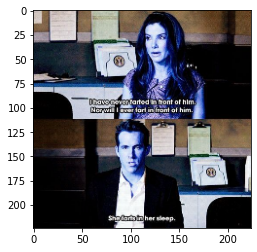

In [506]:
plt.imshow(image)

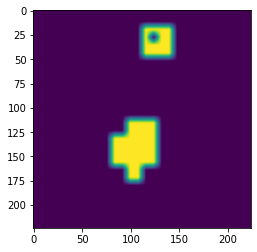

In [507]:
plt.imshow(pred_mask)

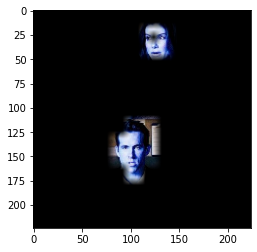

In [508]:
#Masking the image with mask
image2=image
image2[:,:,0]=pred_mask*image[:,:,0]
image2[:,:,1]=pred_mask*image[:,:,1]
image2[:,:,2]=pred_mask*image[:,:,2]

output_image=image2

plt.imshow(output_image)

**Drawing the bounding box around the faces**

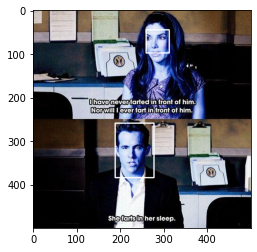

In [509]:
from skimage.measure import label,regionprops

label=label(pred_mask)
props=regionprops(label)
image_bbox=unscaled.copy()

for prop in props:
  X1=round(prop.bbox[1]*unscaled.shape[0]/pred_mask.shape[0])
  Y1=round(prop.bbox[0]*unscaled.shape[1]/pred_mask.shape[1])
  X2=round(prop.bbox[3]*unscaled.shape[0]/pred_mask.shape[0])
  Y2=round(prop.bbox[2]*unscaled.shape[1]/pred_mask.shape[1])
  cv2.rectangle(image_bbox,(X1,Y1),(X2,Y2),(255,255,255),2)

plt.imshow(image_bbox)

##**PART2**

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

**Change current working directory to project folder. [ Score: 2 points ]**

In [7]:
#### Add your code here ####
os.chdir("/content/gdrive/MyDrive/Colab Notebooks/CV_Notebooks/Project2/Part2")

**Extract the zip file [ Score: 2 points ]**
- Extract Aligned Face Dataset from Pinterest.zip

In [512]:
#### Add your code here ####
from zipfile import ZipFile
#Zip file name:Part 3 - Aligned Face Dataset from Pinterest.zip
with ZipFile("./Part 3 - Aligned Face Dataset from Pinterest.zip",'r') as Z:
  Z.extractall()

**Function to load images**
- Define a function to load the images from the extracted folder and map each image with person id 


In [8]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

**Define function to load image**
- Define a function to load image from the metadata

In [9]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

**Load a sample image [ Score: 2 points ]**
- Load one image using the function "load_image"

In [10]:
metadata.shape

(10770,)

metadata has 10770 rows with each row containing each image path

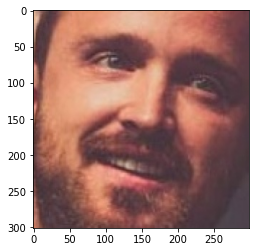

In [75]:
#### Add your code here ####
img1=load_image(metadata[0].image_path())
plt.imshow(img1)

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

**Load the model [ Score: 2 points ]**
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [12]:
model = vgg_face() #### Add your code here ####
#### Add your code here ####
model.load_weights("./Part 3 - vgg_face_weights.h5")

**Get vgg_face_descriptor**

In [13]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

**Generate embeddings for each image in the dataset**
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [532]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


**Function to get the embeddings for all images**

In [14]:
def image_vector(index):
  img_path = metadata[index].image_path()
  img = load_image(img_path)

  # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
  img = (img / 255.).astype(np.float32)

  img = cv2.resize(img, dsize = (224,224))

  # Obtain embedding vector for an image
  # Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

  embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
  return embedding_vector

**Generate embeddings for all images  [ Score: 3 points ]**
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [24]:
embeddings = np.zeros((metadata.shape[0], 2622))

for i, m in enumerate(metadata):
  #### Add your code here ####
  embeddings[i]=image_vector(i)

**Function to calculate distance between given 2 pairs of images.**

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [27]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

**Plot images and get distance between the pairs given below**
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

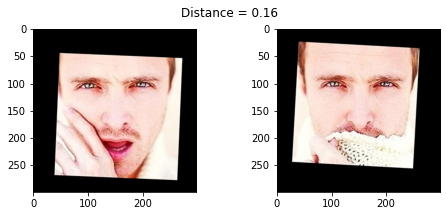

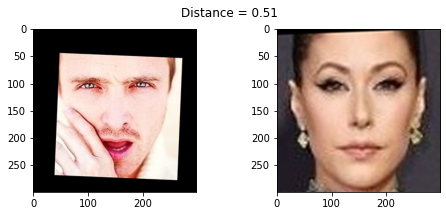

In [28]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

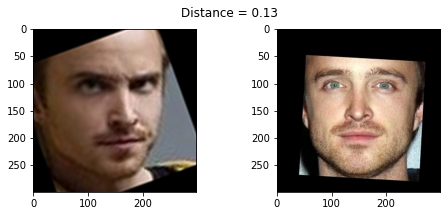

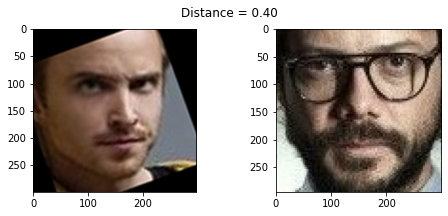

In [29]:
show_pair(30, 31)
show_pair(30, 100)

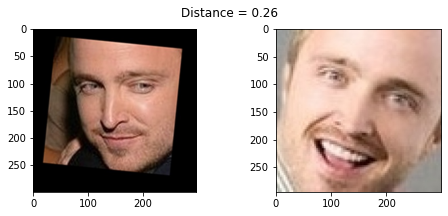

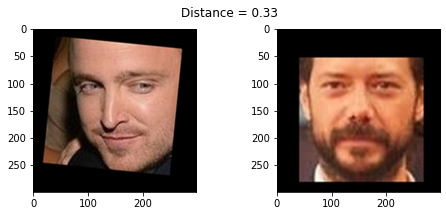

In [30]:
show_pair(70, 72)
show_pair(70, 115)

**Create train and test sets [ Score: 2 points ]**
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [31]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities
X_test = embeddings[test_idx]
#### Add your code here ####

targets = np.array([m.name for m in metadata])
#train labels
y_train = targets[train_idx]
#test labels
#### Add your code here ####
y_test = targets[test_idx]

#### Encode the Labels  [ Score: 2 points ]
- Encode the targets
- Use LabelEncoder

In [32]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
targets_label=label_encoder.fit_transform(targets)

#### Add your code here ####

All target labels are encoded at once and then we have taken train and test labels

In [33]:
#train labels
y_train = targets_label[train_idx]
#test labels
#### Add your code here ####
y_test = targets_label[test_idx]

**Standardize the feature values [ Score: 2 points ]**
- Scale the features using StandardScaler

In [39]:
# Standarize features
from sklearn.preprocessing import StandardScaler

std_scalar=StandardScaler()
X_train_std=std_scalar.fit_transform(X_train)
X_test_std=std_scalar.transform(X_test)

#### Add your code here ####

**Reduce dimensions using PCA (3 marks)**
- Reduce feature dimensions using Principal Component Analysis
- Set the parameter n_components=128

In [40]:
from sklearn.decomposition import PCA

pca=PCA(n_components=128)

X_train_pca=pca.fit_transform(X_train_std)
X_test_pca=pca.transform(X_test_std)

#### Add your code here ####

**Build a Classifier (3 marks)**
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_classifier=SVC()
svc_classifier.fit(X_train_pca,y_train)

#### Add your code here ####

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
svc_classifier.score(X_train_pca,y_train)

0.9963438838399665

In [43]:
svc_classifier.score(X_test_pca,y_test)

0.9590643274853801

**Test results (2 marks)**
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

In [70]:
def predict_image(img_pred):
  #Preprocessing the image same as trained images are done
    img_pred = (img_pred / 255.).astype(np.float32)
    img = cv2.resize(img_pred, dsize = (224,224))

  # Obtain embedding vector for an image
  # Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 
    embeddings_pred = np.zeros((metadata.shape[0], 2622))
    embeddings_pred = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))
    embeddings_pred_std=std_scalar.transform(embeddings_pred)
    embeddings_pred_pca=pca.transform(embeddings_pred_std)

    y_pred=svc_classifier.predict(embeddings_pred_pca)
    pred_identity = label_encoder.inverse_transform(y_pred)[0]
    return pred_identity

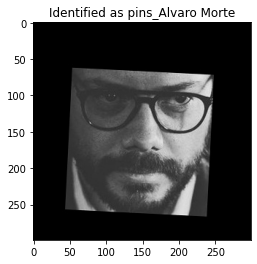

In [71]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())

example_identity = predict_image(example_image)

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

**Verifying the test images given**

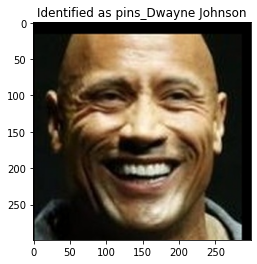

In [72]:
example_image = load_image("Part 2 - Test Image - Dwayne Johnson4.jpg")

example_identity = predict_image(example_image)

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

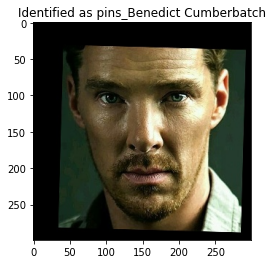

In [73]:
example_image = load_image("Part 2- Test Image - Benedict Cumberbatch9.jpg")

example_identity = predict_image(example_image)

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');